In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns; sns.set() # graphing data

import warnings
warnings.filterwarnings("ignore")

In [2]:
price_df = pd.read_csv('d:\homework\FIN3080\HW2\TRD_Mnth.csv')
pershare_df= pd.read_csv('d:\homework\FIN3080\HW2\FI_T9.csv')
#转换日期格式
price_df['Trdmnt'] = pd.to_datetime(price_df['Trdmnt'])
pershare_df['Accper'] = pd.to_datetime(pershare_df['Accper'])
# 提取年月信息
price_df['YM'] = price_df['Trdmnt'].dt.to_period('M')
pershare_df['YM'] = pershare_df['Accper'].dt.to_period('M')
# 确保两个表有相同的股票代码列
common_stock_codes = pd.merge(price_df[['Stkcd']].drop_duplicates(), pershare_df[['Stkcd']].drop_duplicates(), how='inner', on='Stkcd')

# 根据相同的股票代码和年月进行合并
merged_df = pd.merge(price_df[price_df['Stkcd'].isin(common_stock_codes['Stkcd'])], pershare_df[pershare_df['Stkcd'].isin(common_stock_codes['Stkcd'])], on=['Stkcd', 'YM'], how='left')

merged_df['F091001A'] = merged_df['F091001A'].fillna(method='bfill')
merged_df['PB ratio'] = merged_df['Mclsprc'] / (merged_df['F091001A'])
# 计算百分位数
percentile_5 = merged_df['PB ratio'].quantile(0.05)
percentile_95 = merged_df['PB ratio'].quantile(0.95)

# 排除在百分位5以下和95以上的PB值
filtered_PB_df = merged_df[(merged_df['PB ratio'] > percentile_5) & (merged_df['PB ratio'] < percentile_95)]

In [3]:
# 定义函数来删除 Typrep 为 'B' 的行
def filter_rows(group):
    if 'A' in group['Typrep'].values and 'B' in group['Typrep'].values:
        return group[group['Typrep'] != 'B']
    else:
        return group

# 按 Stkcd 分组，并应用函数来删除 Typrep 为 'B' 的行.reset_index(drop=True)
filtered_PB_df = filtered_PB_df.groupby('Stkcd').apply(filter_rows)

In [4]:
filtered_PB_df.head(10)

,Stkcd,Trdmnt,Mclsprc,Mretnd,YM,ShortName_EN,Accper,Typrep,F091001A,PB ratio
0,1,2009-12-01,24.37,0.004534,2009-12,SFZA,2009-12-31,A,6.591545,3.697161
1,1,2010-01-01,21.70,-0.109561,2010-01,NaN,NaT,NaN,7.119722,3.047872
2,1,2010-02-01,22.45,0.034562,2010-02,NaN,NaT,NaN,7.119722,3.153213
3,1,2010-03-01,23.20,0.033408,2010-03,SFZA,2010-03-31,A,7.119722,3.258554
4,1,2010-04-01,20.56,-0.113793,2010-04,NaN,NaT,NaN,8.729121,2.355335
5,1,2010-05-01,17.51,-0.148346,2010-05,NaN,NaT,NaN,8.729121,2.005929
6,1,2010-06-01,17.51,0.000000,2010-06,SFZA,2010-06-30,A,8.729121,2.005929
7,1,2010-09-01,16.22,-0.073672,2010-09,SFZA,2010-09-30,A,9.223531,1.758546
8,1,2010-10-01,18.41,0.135018,2010-10,NaN,NaT,NaN,9.525797,1.932647
9,1,2010-11-01,16.39,-0.109723,2010-11,NaN,NaT,NaN,9.525797,1.720591


In [6]:
YM_df = filtered_PB_df.groupby('YM')
YM_df.head(10)

,Stkcd,Trdmnt,Mclsprc,Mretnd,YM,ShortName_EN,Accper,Typrep,F091001A,PB ratio
0,1,2009-12-01,24.37,0.004534,2009-12,SFZA,2009-12-31,A,6.591545,3.697161
1,1,2010-01-01,21.70,-0.109561,2010-01,NaN,NaT,NaN,7.119722,3.047872
2,1,2010-02-01,22.45,0.034562,2010-02,NaN,NaT,NaN,7.119722,3.153213
3,1,2010-03-01,23.20,0.033408,2010-03,SFZA,2010-03-31,A,7.119722,3.258554
4,1,2010-04-01,20.56,-0.113793,2010-04,NaN,NaT,NaN,8.729121,2.355335
...,...,...,...,...,...,...,...,...,...,...
2155,20,2023-07-01,12.01,0.038029,2023-07,NaN,NaT,NaN,4.494282,2.672284
2224,21,2015-03-01,11.46,0.269103,2015-03,SKJ,2015-03-31,A,3.590630,3.191640
2225,21,2015-04-01,13.71,0.196335,2015-04,NaN,NaT,NaN,3.557755,3.853554
2226,21,2015-05-01,15.00,0.094092,2015-05,NaN,NaT,NaN,3.557755,4.216142


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

deciles = filtered_PB_df.groupby('YM')['PB ratio'].apply(lambda x: pd.qcut(x, 10, labels=False, duplicates='drop'))





In [9]:
deciles

YM             
2009-12  0         4
         151       1
         406       9
         551       1
         873       4
                  ..
2023-12  501234    1
         501293    8
         501446    0
         501534    0
         501632    0
Name: PB ratio, Length: 501999, dtype: int64

In [22]:
filtered_PB_df['PB ratio'] = filtered_PB_df['PB ratio'].astype(np.float32)


In [24]:
# 将十分位数加入 DataFrame
filtered_PB_df['Decile'] = filtered_PB_df.groupby('YM')['PB ratio'].transform(lambda x: pd.qcut(x, q=10, labels=False))



In [25]:
filtered_PB_df

,Stkcd,Trdmnt,Mclsprc,Mretnd,YM,ShortName_EN,Accper,Typrep,F091001A,PB ratio,Decile
0,1,2009-12-01,24.370,0.004534,2009-12,SFZA,2009-12-31,A,6.591545,3.697160,4
1,1,2010-01-01,21.700,-0.109561,2010-01,NaN,NaT,NaN,7.119722,3.047872,3
2,1,2010-02-01,22.450,0.034562,2010-02,NaN,NaT,NaN,7.119722,3.153213,3
3,1,2010-03-01,23.200,0.033408,2010-03,SFZA,2010-03-31,A,7.119722,3.258554,3
4,1,2010-04-01,20.560,-0.113793,2010-04,NaN,NaT,NaN,8.729121,2.355335,1
...,...,...,...,...,...,...,...,...,...,...,...
501994,900957,2017-10-01,1.034,-0.064253,2017-10,NaN,NaT,NaN,1.214449,0.851415,0
501995,900957,2017-11-01,0.976,-0.056093,2017-11,NaN,NaT,NaN,1.214449,0.803657,0
501996,900957,2017-12-01,0.969,-0.007172,2017-12,LYBG,2017-12-31,A,1.214449,0.797893,0
501997,900957,2018-01-01,0.880,-0.091847,2018-01,NaN,NaT,NaN,1.238680,0.710434,0


In [26]:
# 计算每个月每个组的平均回报率
monthly_returns = filtered_PB_df.groupby(['YM', 'Decile'])['Mretnd'].mean().reset_index()

# 计算每个组2010年1月到2023年12月的月平均回报的平均值
average_returns = monthly_returns.groupby('Decile')['Mretnd'].mean()

In [27]:
average_returns

Decile
0   -0.004677
1   -0.003718
2   -0.001577
3    0.000469
4    0.004367
5    0.006585
6    0.011022
7    0.016237
8    0.024279
9    0.038404
Name: Mretnd, dtype: float64

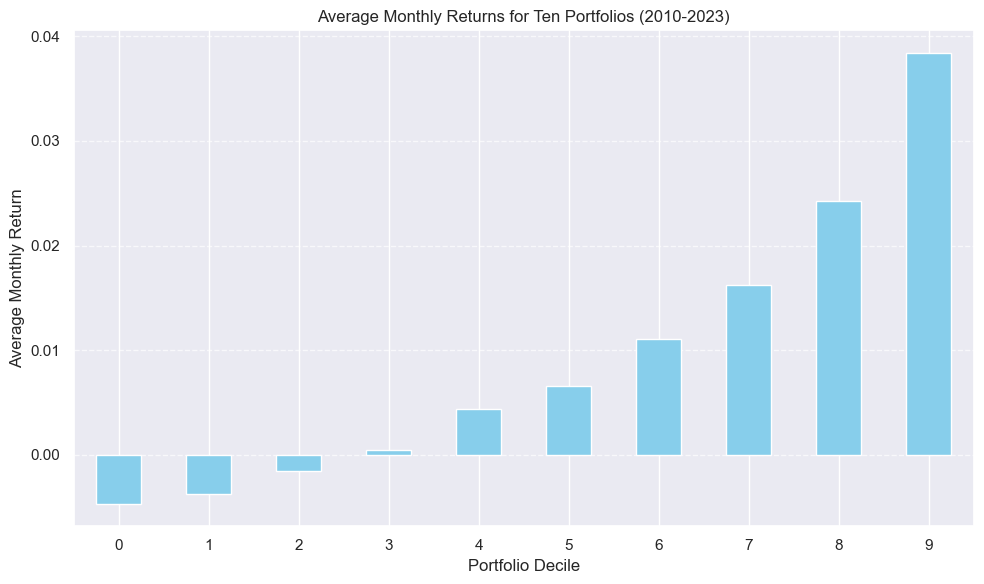

Decile
0   -0.004677
1   -0.003718
2   -0.001577
3    0.000469
4    0.004367
5    0.006585
6    0.011022
7    0.016237
8    0.024279
9    0.038404
Name: Mretnd, dtype: float64


In [28]:
plt.figure(figsize=(10, 6))
average_returns.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Returns for Ten Portfolios (2010-2023)')
plt.xlabel('Portfolio Decile')
plt.ylabel('Average Monthly Return')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 打印结果
print(average_returns)